# Clase 6

[ 0.3198768   0.3677771   0.73261244  0.31034788  0.58857405  0.3568195
  0.20445456  0.38639565  0.14282806  0.39255695 -0.20778602 -0.03830765
 -0.67711194 -0.1247451   0.06896615 -0.3335238  -0.31555953 -0.51313983
 -0.85131633  0.04840735 -0.12324135 -0.47131698 -0.22418781 -0.40257514
 -0.7151441  -0.78253498 -0.03476472 -0.15096332 -0.45234292  0.02761496
 -0.02151025 -0.31315018 -0.44614343 -0.43888865 -0.57473996 -0.25374549
 -0.56388115 -0.59710613 -0.11849376 -0.11881663 -0.44167876  0.21102511
 -0.01522722  0.37171628 -0.29478484  0.63993017  0.2776278   0.61612433
  0.36808403 -0.00766233  0.79677346  0.91508419  0.80948419  1.04129354
  0.59780205  0.35059324  0.82439992  1.23572265  0.73629654  0.99072267
  1.16149322  0.99284762  1.14343847  1.05448922  1.75424139  0.97708434
  1.5564581   1.53232326  1.30982846  1.5131443   1.30537616  1.81003492
  1.29264063  1.25367798  1.62323914  1.96020813  1.01200879  1.35326365
  1.6176398   1.46564097  1.29899016  1.06633023  1.

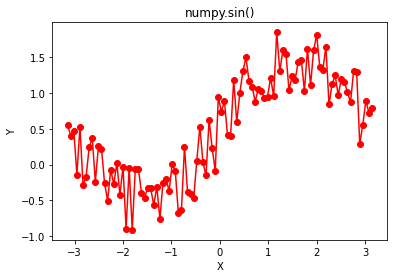

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
  
X = np.linspace(-np.pi, np.pi, 100)
aux = np.random.rand(100)
Y = np.sin(x) + aux

print(y)

plt.plot(X, Y, color = 'red', marker = "o")
plt.title("numpy.sin()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [20]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)
 
# Using the formula to calculate m and c
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
print(m, c)


0.2882928324073815 0.5034051123362826


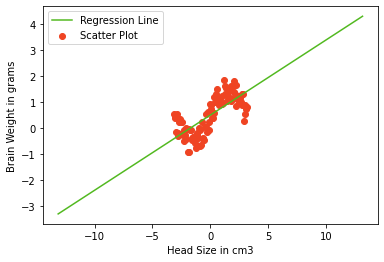

In [22]:
max_x = np.max(X) + 10
min_x = np.min(X) - 10
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
 
# Ploting Line
plt.plot(x, y, color='#52b920', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef4423', label='Scatter Plot')
 
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [23]:
def funcion_perdida(y, y_pred):
    perdida = np.mean((y_pred-y)**2)
    return perdida

In [24]:
def gradiente(X, y, y_pred):
    m = X.shape[0]
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum((y_pred-y))
    return dw,db

In [35]:
def x_transform(X, grados):
    t = X.copy()
    for i in range(grados):
        X = np.append(X, t**i, axis = 1)
    return X

In [39]:
grados = 4
for i in range(grados):
    print(i)
    

0
1
2
3


In [36]:
def train(X, y, bs, degrees, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X.
    x = x_transform(X, degrees)
    
    # m-> number of training examples
    # n-> number of features 
    m, n = x.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradiente(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [37]:
def predict(X, w, b, degrees):
    

    x1 = x_transform(X, degrees)
    
    # Returning predictions.
    return np.dot(x1, w) + b

In [40]:
w, b, l = train(X, y, bs=100, degrees= 2, epochs=1000, lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

In [106]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(1000,1)
y = 5*((X)**(2)) + np.random.rand(1000,1)

In [107]:
def loss(y, y_hat):
    
    # y --> true/target value.
    # y_hat --> hypothesis
    
    #Calculating loss.
    loss = np.mean((y_hat - y)**2)
    return loss

In [108]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [109]:
def x_transform(X, degrees):
    
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # making a copy of X.
    t = X.copy()
    
    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t**i, axis=1)
            
    return X

In [110]:
def train(X, y, bs, degrees, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X.
    x = x_transform(X, degrees)
    
    # m-> number of training examples
    # n-> number of features 
    m, n = x.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


In [111]:
def predict(X, w, b, degrees):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    x1 = x_transform(X, degrees)
    
    # Returning predictions.
    return np.dot(x1, w) + b

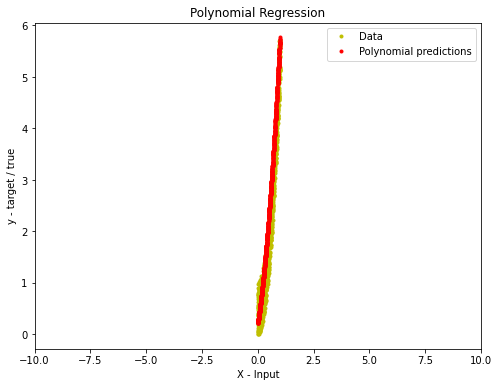

In [112]:
w, b, l = train(X, y, bs=100, degrees=[4], epochs=1000,
                lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.xlim([-10, 10])
plt.show()